In [14]:
import pandas as pd
import numpy as np
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context("talk")
sns.set_style("white")

In [15]:
# Commodity costs for SMC and ITN 

# ITN

In [16]:
df = pd.read_csv("sim_data_full.csv")

In [19]:
0.7*5000*2.48

8680.0

In [18]:
df_itn = df[np.in1d(df["scenario_number"],[30,31])]
df_itn.groupby("scenario_number").agg({"cost_ITNs": "mean"}).reset_index()

,scenario_number,cost_ITNs
0,30,8680.0
1,31,11160.0


In [20]:
(11160.0-8680.0)/5

496.0

# SMC

In [23]:
df_esmc = df[np.logical_and(df["archetype"]=="Sahel",
                            np.in1d(df["scenario_number"],[35,36]))]

In [29]:
foo = df_esmc[["scenario_number","cost_SMC_low","cost_SMC_mean", "cost_SMC_high"]].groupby("scenario_number").agg("mean").reset_index()

In [40]:
foo["cost_SMC_low"] = foo["cost_SMC_low"]/5/2 # per 1k pop, per year
foo["cost_SMC_high"] = foo["cost_SMC_high"]/5/2 # per 1k pop, per year
foo["cost_SMC_mean"] = foo["cost_SMC_mean"]/5/2 # per 1k pop, per year


In [42]:
foo

,scenario_number,cost_SMC_low,cost_SMC_mean,cost_SMC_high
0,35,557.877801,1576.675471,2595.473141
1,36,575.905585,2103.859386,3631.813186


meta NOT subset; don't know how to subset; dropped


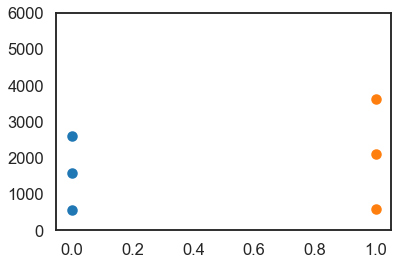

In [48]:
plt.scatter([0,0,0],np.array([557.8778011,1576.6754710,2595.4731409]))
plt.scatter([1,1,1],np.array([575.9055852,2103.8593858,3631.8131864]))
plt.ylim([0,6000])
plt.savefig("smc_costs_jank.pdf")

<AxesSubplot:xlabel='scenario_number', ylabel='cost_SMC_mean'>

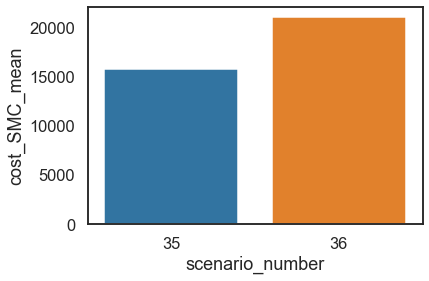

In [34]:
sns.barplot(data=foo, x="scenario_number", y="cost_SMC_mean")